#### Time Series Analysis of Stocks: Project

### STEP 1: Importing the Time Series Functions File and Ignoring warnings

In [40]:
#Importing the tsfunct.py (Time Series Functions) file
import tsfunct as tsf
import warnings
warnings.filterwarnings("ignore")

### STEP 2: Providing the Input Data & Downloading Stock Data and concise description of its Stock Holders

In [7]:
start_date='2021-06-01'
#end_date='2025-03-31'
end_date='2023-03-31'
ticker_name,stock_series=tsf.stock_data('HUBB',start_date ,end_date)

[*********************100%***********************]  1 of 1 completed


Price        Close        High         Low        Open        Volume
Ticker        HUBB        HUBB        HUBB        HUBB          HUBB
count   462.000000  462.000000  462.000000  462.000000  4.620000e+02
mean    196.956483  199.076863  194.653764  196.878121  3.475637e+05
std      23.536961   23.878304   23.224631   23.528450  2.390233e+05
min     163.359512  164.895637  160.935258  162.056793  7.572300e+04
25%     177.029282  178.927614  174.687299  176.995393  2.111288e+05
50%     189.890457  191.372878  187.726529  189.731516  2.924745e+05
75%     216.294426  219.364839  213.572791  216.749232  4.195435e+05
max     248.365982  253.442000  245.366708  252.027036  3.336907e+06
Breakdown                          Value
insidersPercentHeld              0.00376
institutionsPercentHeld          0.98342
institutionsFloatPercentHeld     0.98714
institutionsCount             1235.00000
  Date Reported                                Holder  pctHeld   Shares  \
0    2025-06-30               

### STEP 3: Plotting the Stock Line Chart to have a brief understanding about its trend and seasonality.

CHECK WHAT TYPE OF DECOMPOSITION IS REQUIRED, DEFAULT WILL BE ADDITIVE


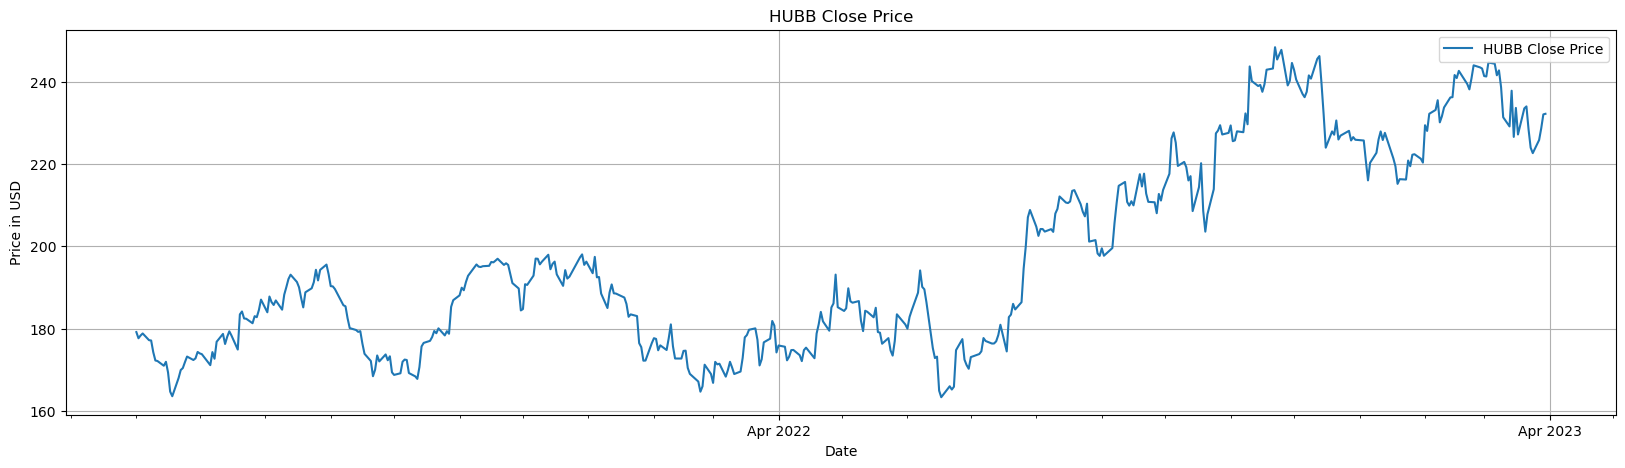

In [9]:
tsf.stock_line_chart(ticker_name,stock_series)

#### Step 3 Conclusion: 
Checking the chart, it appears that it has an upward moving trend and a seasonal behavior occuring every 6 months. 
The pattern between Apr 2023 and Oct 2023 seems to be reapeating.

### STEP 4: Decompose the model and plot charts for the decomposed components

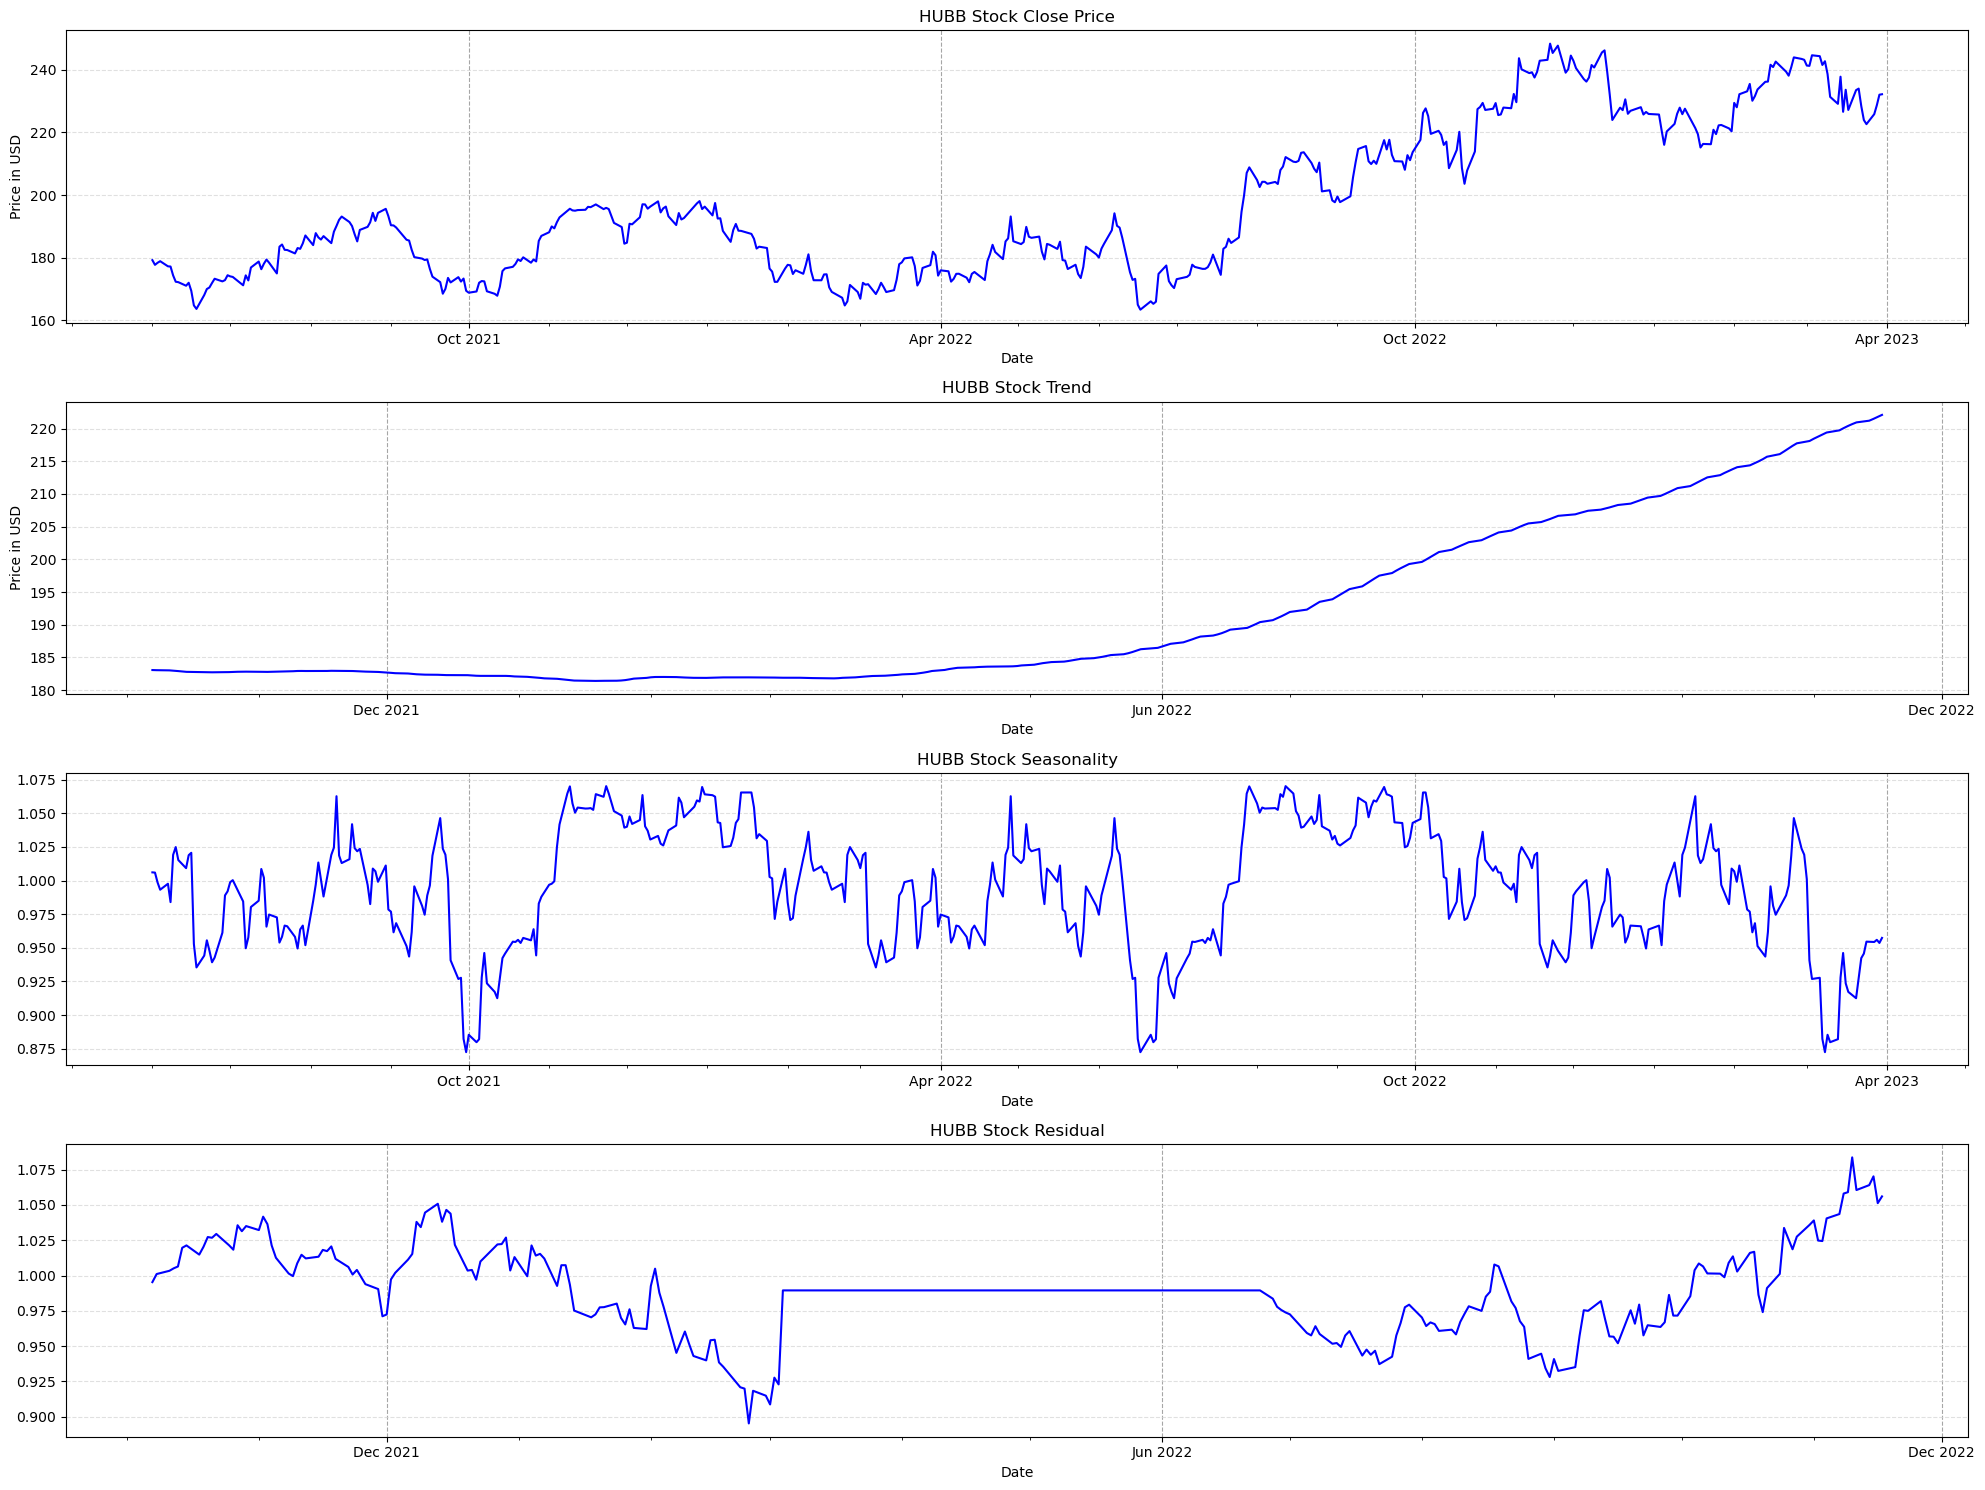

In [12]:
tsf.decompose_model(ticker_name,stock_series,decomposition_type='classical',model_type='multiplicative',period=180)

#### Step 4 Conclusion: 
The classical decomposition multiplicative model has nicely decomposed the time series.
The upward trend and the seasonal behavior appears clearly visible and match to what was seen in the normal stock line chart.

### STEP 5: CHECK IF THE RAW TIME SERIES IS STATIONARY OR NON-STATIONARY

In [15]:
tsf.stationarity_check(stock_series,kpss_reg_type='ct')

---------------------------------------------------------------
Augmented Dickey Fuller (ADF) Statistic Results:
---------------------------------------------------------------
The p_value (0.6454) is greater than or equal to 0.05
Failed to reject the null hypotheses (Time series is non-stationary).
The time series is non-stationary 
---------------------------------------------------------------
---------------------------------------------------------------
Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Statistic Results:
---------------------------------------------------------------
The p_value (0.01) is less than or equal to 0.05
Reject the null hypotheses  (Time series is stationary).
The time series is non-stationary 
---------------------------------------------------------------
The time series is confidently NON-STATIONARY


'Transformation Required'

#### Step 5 Conclusion:
Using the ADF test and KPSS test, it is evident that the raw time series is not stationary and hence the time series is required to be transformed to make it stationary to be used in the Time Series Models.

### STEP 6: MAKING THE TIME SERIES STATIONARY

In [18]:
stationary_series=tsf.make_stationary(stock_series)

------------------------------------------------------------------------------------------------------
Statistics for Logarithmic Transformation of the Time Series:
------------------------------------------------------------------------------------------------------
---------------------------------------------------------------
Augmented Dickey Fuller (ADF) Statistic Results:
---------------------------------------------------------------
The p_value (0.6312) is greater than or equal to 0.05
Failed to reject the null hypotheses (Time series is non-stationary).
The time series is non-stationary 
---------------------------------------------------------------
---------------------------------------------------------------
Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Statistic Results:
---------------------------------------------------------------
The p_value (0.01) is less than or equal to 0.05
Reject the null hypotheses  (Time series is stationary).
The time series is non-stationary 
---

#### Step 6 Conclusion:
After running the transformation function, the time series could not be made stationary by the following transformation operations:
    a. Logarithmic Transformation
    b. Square Root Transformation
    c. Box-Cox Transformation
    d. Detrending Line Transformation
    e. Detrending Seasonal Transformation

The time series was successfully made stationary by the "First Order Differencing Transformation". Hence (d=1 for ARIMA models)

### STEP 7: Plotting/Visualizing the Stationary Time Series

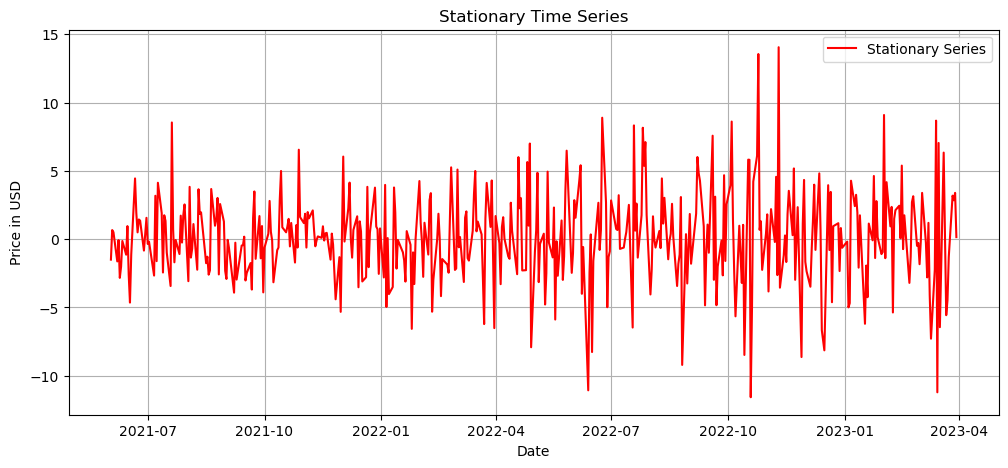

In [21]:
tsf.plot_stationary_time_series(stationary_series)

#### Step 7 Conclusion:
The time series does look stationary with a constant mean around 0 and constant variance between 35 and -35.

#### To make the series stationary, it had to be drifferenced once that is (d=1).
#### Since d=1, it indicates that models AR, MA and ARMA could be used but they would had to be integrated after the model has been used to make predictions so as to get the predictions on the original time series.

### STEP 8: Plotting the ACF/PACF charts to get an idea about the order (p,q) for the ARIMA model.

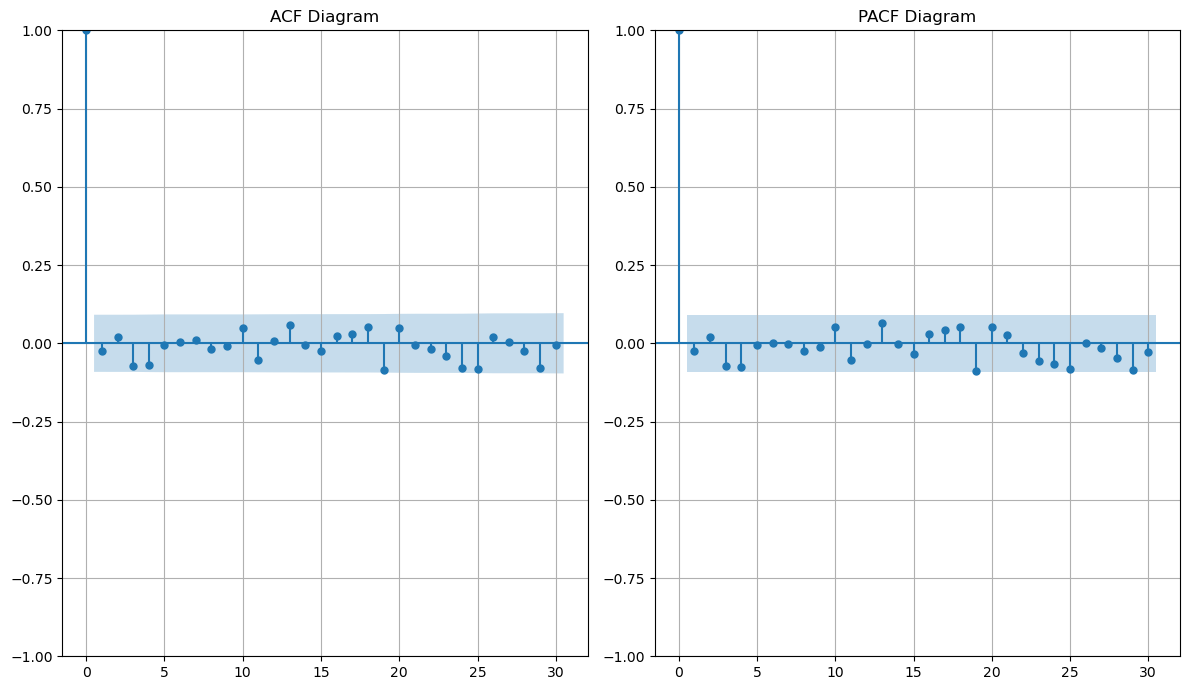

In [25]:
tsf.acf_pacf_plots(stationary_series)

#### Step 8 Conclusion:
The ACF, PACF chart both cuts-off at lag 0. They do not help much as none of them tails off gradually. 
It would be better to use ARIMA model in this case and try different paramters.

### STEP 9: Training & Testing ARIMA models with different (p,q) parameters and selecting the best parameters.

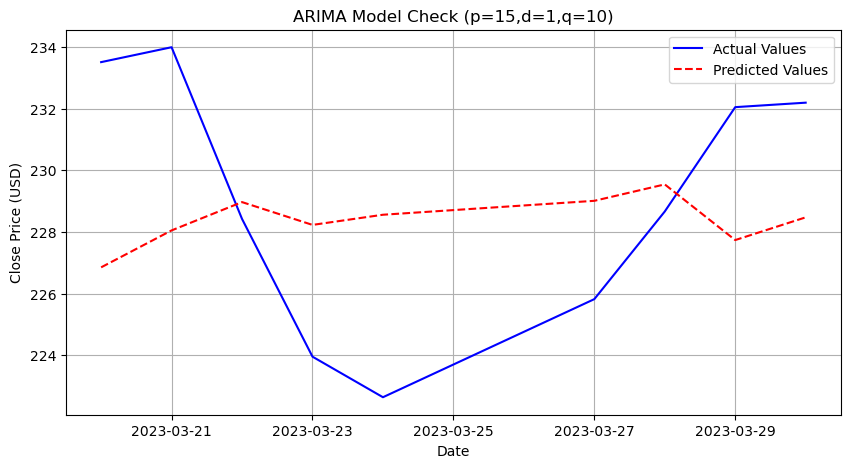

RMSE: 4.4287


In [47]:
train_data, test_data = stock_series[:-9], stock_series[-9:]
RMSE=tsf.run_arima(train_data,test_data,15,1,10)
print(f'RMSE: {RMSE}')
#tsf.run_arima(train_data,test_data,40,1,13)

#### Step9 Conclusion:
After trying different values of the hyperparameters 'p' & 'q' with d=1, it appears that the model best matches for hyperparameter p = 15, d=1 & q=10 with an RMSE score of 4.4287.

We could try more set of different parameter combinations and chose the best parameters by comparing the AIC/BIC score of the different ARIMA models.